# Demo: Normal Distribution of Stock Ticker Data

This program retrieves stock price data using the Alpaca API and plots the data using Pandas. These plots demonstrate the distribution of daily stock closing prices compared to the expected normal probability distribution. 

## Import Dependencies

In [1]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi

# Load .env environment variables
from dotenv import load_dotenv
load_dotenv()

%matplotlib inline

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

## Get 1 Year's Worth of Stock Price Data via Alpaca API Call and Read in as DataFrame 

In [10]:
# Set the Tesla and Coca-Cola tickers
ticker = ["TSLA","KO"]

# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes of 1 year, between now and 365 days ago.
start_date = pd.Timestamp("2019-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

# Get 1 year's worth of historical data for Tesla and Coca-Cola
df_ticker = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
TSLA = df_ticker[df_ticker['symbol']=='TSLA'].drop('symbol', axis=1)
KO = df_ticker[df_ticker['symbol']=='KO'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_ticker = pd.concat([KO, TSLA],axis=1, keys=['KO','TSLA'])

# Display sample data
df_ticker

KO                                               \
                            open     high    low  close    volume trade_count   
timestamp                                                                       
2019-05-01 04:00:00+00:00  48.95  49.0750  48.55  48.59  10551594       55430   
2019-05-02 04:00:00+00:00  48.53  48.7657  48.27  48.39   8724932       49477   
2019-05-03 04:00:00+00:00  48.60  48.9600  48.52  48.72   7076949       39003   
2019-05-06 04:00:00+00:00  48.33  48.6100  48.26  48.47   8658209       44597   
2019-05-07 04:00:00+00:00  48.23  48.2900  47.77  48.00  12487481       59828   
...                          ...      ...    ...    ...       ...         ...   
2020-04-27 04:00:00+00:00  46.00  46.9750  45.71  46.78  19175988      124751   
2020-04-28 04:00:00+00:00  47.90  48.0000  46.57  46.74  17246696      119237   
2020-04-29 04:00:00+00:00  47.20  47.8600  46.88  47.12  15780082      112219   
2020-04-30 04:00:00+00:00  46.80  47.0000  45.70  45.89  20801092      142157   
2020-05-01 04:00:00+00:00  45.62  46.3900  45.21  45.60  14290418      104457   

                                        TSLA                            \
                                vwap    open      high     low   close   
timestamp                                                                
2019-05-01 04:00:00+00:00  48.792137  238.85  240.0000  231.50  234.01   
2019-05-02 04:00:00+00:00  48.453170  245.65  247.1300  237.72  244.10   
2019-05-03 04:00:00+00:00  48.773171  244.00  256.6100  243.49  255.03   
2019-05-06 04:00:00+00:00  48.465858  250.00  258.3499  248.50  255.34   
2019-05-07 04:00:00+00:00  48.012280  256.80  257.2100  245.10  247.06   
...                              ...     ...       ...     ...     ...   
2020-04-27 04:00:00+00:00  46.501892  737.61  799.4900  735.00  798.75   
2020-04-28 04:00:00+00:00  47.136381  795.30  805.0000  756.69  769.12   
2020-04-29 04:00:00+00:00  47.381483  791.68  803.1999  783.16  800.51   
2020-04-30 04:00:00+00:00  46.036240  855.00  869.8200  763.50  781.88   
2020-05-01 04:00:00+00:00  45.640609  755.00  772.7700  683.04  701.32   

                                                             
                             volume trade_count        vwap  
timestamp                                                    
2019-05-01 04:00:00+00:00  10704355      108382  234.544288  
2019-05-02 04:00:00+00:00  18167261      173521  242.763484  
2019-05-03 04:00:00+00:00  23740838      205076  252.330502  
2019-05-06 04:00:00+00:00  10860343       93066  254.021222  
2019-05-07 04:00:00+00:00  10261408      103693  249.863277  
...                             ...         ...         ...  
2020-04-27 04:00:00+00:00  20681442      433976  783.972936  
2020-04-28 04:00:00+00:00  15222719      313311  776.861887  
2020-04-29 04:00:00+00:00  16223632      369255  806.504911  
2020-04-30 04:00:00+00:00  28477961      615142  814.171635  
2020-05-01 04:00:00+00:00  32544885      728694  719.397692  

[254 rows x 14 columns]

## Pick closing prices and compute the daily returns

In [24]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()


# Fetch the closing prices of KO and TSLA
df_closing_prices["KO"] = df_ticker["KO"]["close"]
df_closing_prices["TSLA"] = df_ticker["TSLA"]["close"]



# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date


# Compute daily returns
df_daily_returns = df_closing_prices.pct_change().dropna()

# Display sample data
df_daily_returns

,KO,TSLA
2019-05-02,-0.004116,0.043118
2019-05-03,0.006820,0.044777
2019-05-06,-0.005131,0.001216
2019-05-07,-0.009697,-0.032427
2019-05-08,-0.003125,-0.008986
...,...,...
2020-04-27,0.029716,0.101496
2020-04-28,-0.000855,-0.037095
2020-04-29,0.008130,0.040813
2020-04-30,-0.026104,-0.023273


In [22]:
# Generate descriptive statistics
df_daily_returns.describe()

,KO,TSLA
count,253.000000,253.000000
mean,-0.000056,0.005515
std,0.019682,0.048388
min,-0.096725,-0.185778
25%,-0.006709,-0.011681
50%,0.000192,0.004019
75%,0.006820,0.024596
max,0.064796,0.198949


### Plot Distributions

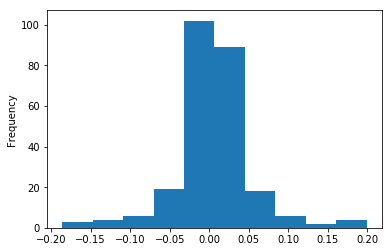

In [6]:
# Visualize distribution of Tesla percent change in closing price using a histogram plot
df_daily_returns["TSLA"].plot.hist()

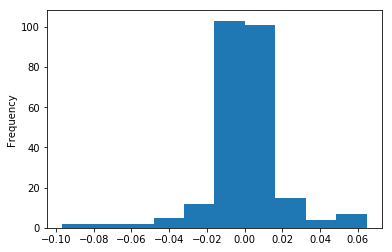

In [7]:
# Visualize distribution of Coca-Cola percent change in closing price using a histogram plot
df_daily_returns["KO"].plot.hist()

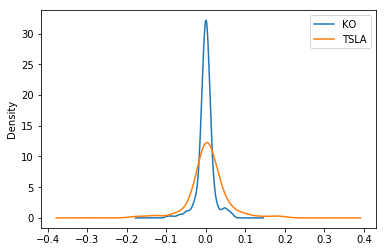

In [8]:
# Visualize the distribution of percent change in closing price for both stocks using a density plot
df_daily_returns.plot.density()